In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
CURR_DIR = os.getcwd()
DATA_DIR = "data//data.csv"

In [3]:
df = pd.DataFrame(pd.read_csv(os.path.join(CURR_DIR,DATA_DIR)))

In [4]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

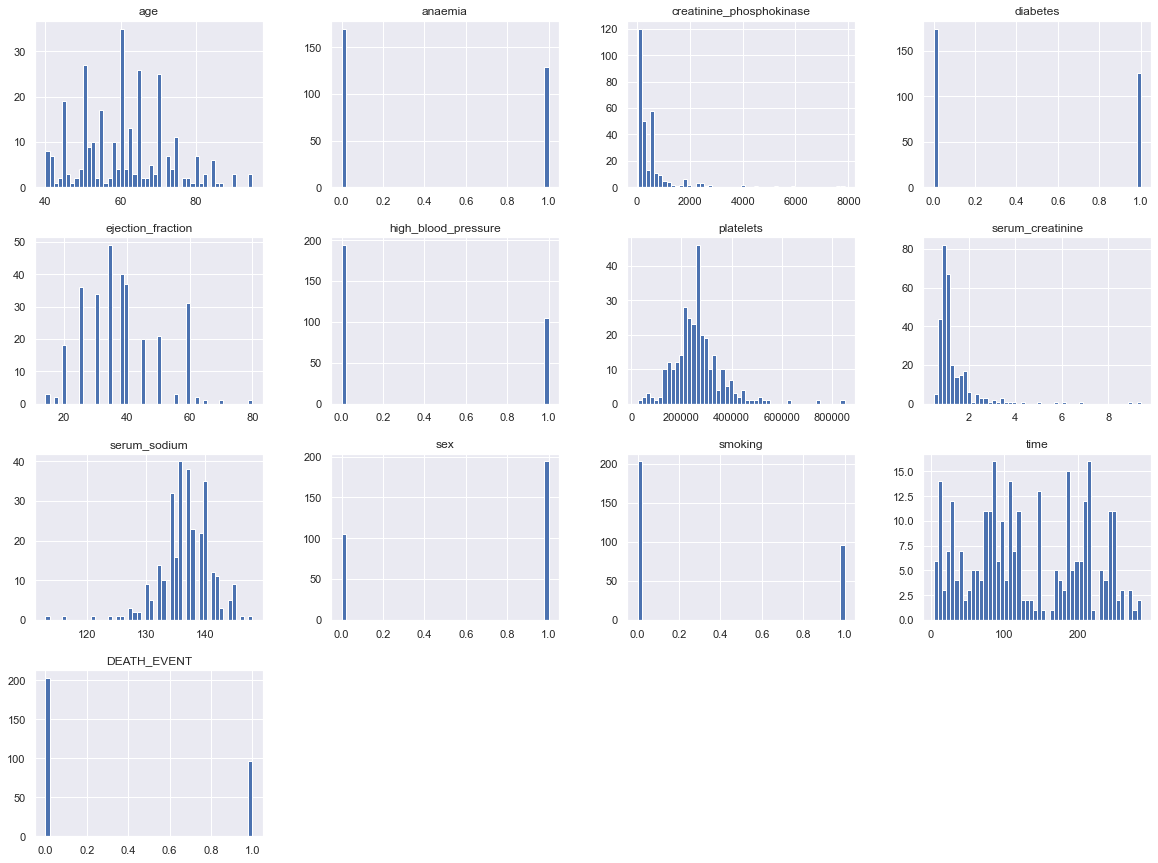

In [8]:
sns.set_theme()
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:>

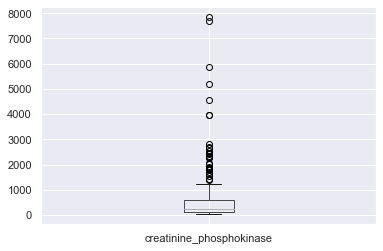

In [9]:
df.boxplot(['creatinine_phosphokinase'])

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
y = df['DEATH_EVENT']
X = df.drop(['DEATH_EVENT'],axis=1)

In [13]:
scaler = StandardScaler()

# Columns to be scaled
sc_cols = ['creatinine_phosphokinase','platelets','time']

# Applying MinMaxScaler
X[sc_cols] = scaler.fit_transform(X[sc_cols])


In [14]:
# After Scaling
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,299.00000,299.000000,299.000000,299.00000,2.990000e+02
mean,60.833893,0.431438,0.000000,0.418060,38.083612,0.351171,7.723291e-17,1.39388,136.625418,0.648829,0.32107,-1.901118e-16
std,11.894809,0.496107,1.001676,0.494067,11.834841,0.478136,1.001676e+00,1.03451,4.412477,0.478136,0.46767,1.001676e+00
min,40.000000,0.000000,-0.576918,0.000000,14.000000,0.000000,-2.440155e+00,0.50000,113.000000,0.000000,0.00000,-1.629502e+00
25%,51.000000,0.000000,-0.480393,0.000000,30.000000,0.000000,-5.208700e-01,0.90000,134.000000,0.000000,0.00000,-7.389995e-01
50%,60.000000,0.000000,-0.342574,0.000000,38.000000,0.000000,-1.390846e-02,1.10000,137.000000,1.000000,0.00000,-1.969543e-01
75%,70.000000,1.000000,0.000166,1.000000,45.000000,1.000000,4.111199e-01,1.40000,140.000000,1.000000,1.00000,9.387595e-01
max,95.000000,1.000000,7.514640,1.000000,80.000000,1.000000,6.008180e+00,9.40000,148.000000,1.000000,1.00000,1.997038e+00


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9)

In [17]:
print("Shape of training set",X_train.shape)
print("Shape of training set",X_test.shape)

Shape of training set (269, 12)
Shape of training set (30, 12)


In [18]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg = LogisticRegression(random_state=0,solver="sag",max_iter=200,penalty='l2')

In [22]:
log_reg.fit(X_train,y_train)

C:\Users\Ashwin\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=200, random_state=0, solver='sag')

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test,log_reg.predict(X_test))

0.9333333333333333